# **CNN Based Classification**

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [8]:
# Define paths for the dataset
train_dir = '/content/drive/MyDrive/Papaya_dataset/Train'
valid_dir="/content/drive/MyDrive/Papaya_dataset/valid"


# Image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

# Use ImageDataGenerator to load and preprocess the data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',

)



train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',

)

validation_generator = train_datagen.flow_from_directory(
    validation_datagen_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',

)



Found 316 images belonging to 5 classes.
Found 76 images belonging to 5 classes.


In [9]:
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 4
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # To prevent overfitting

# Output layer for multiclass classification
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,681,093 (36.93 MB)

 Trainable params: 9,681,093 (36.93 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Define the number of epochs and steps per epoch
EPOCHS = 50


# Train the model
history = model.fit(
    train_generator,

    epochs=EPOCHS,
    validation_data=validation_generator,

)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.2358 - loss: 1.6699 - val_accuracy: 0.5395 - val_loss: 1.2254
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 386ms/step - accuracy: 0.4923 - loss: 1.2665 - val_accuracy: 0.5789 - val_loss: 1.0036
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 357ms/step - accuracy: 0.5824 - loss: 1.1723 - val_accuracy: 0.5263 - val_loss: 1.0452
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 383ms/step - accuracy: 0.5256 - loss: 1.1693 - val_accuracy: 0.5921 - val_loss: 0.9017
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 742ms/step - accuracy: 0.6154 - loss: 1.0297 - val_accuracy: 0.6579 - val_loss: 0.8031
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 357ms/step - accuracy: 0.5545 - loss: 1.0592 - val_accuracy: 0.5921 - val_loss: 0.8719
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 412ms/step - accuracy: 0.6535 - loss: 0.9263 - val_accuracy: 0.6316 - val_loss: 0.7183
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 464ms/step - accuracy: 0.6889 - loss: 0.8333 - val_accuracy:

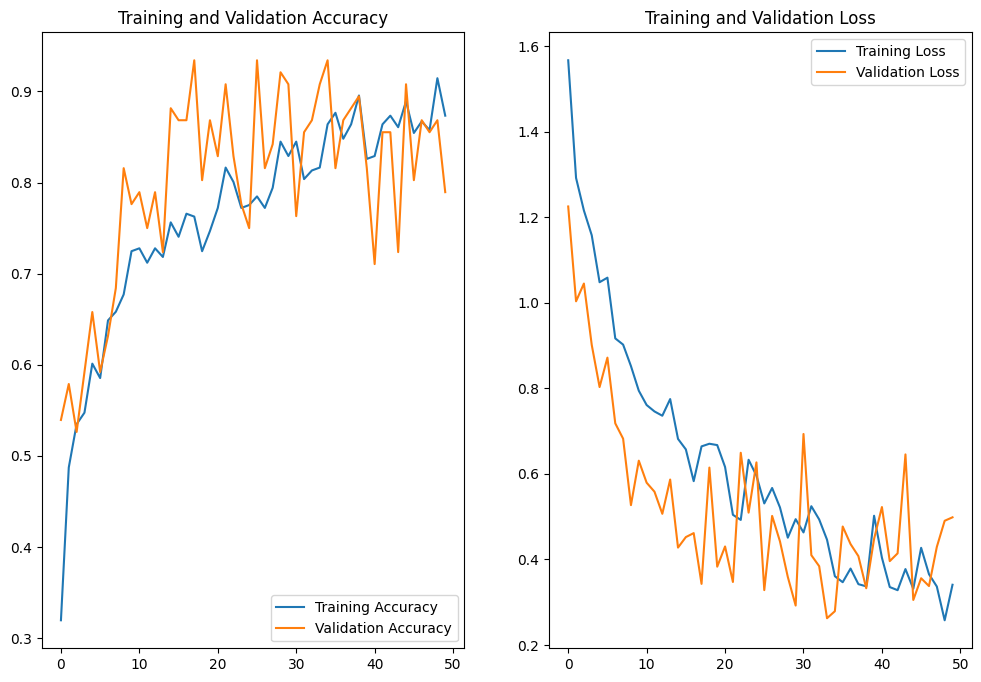

In [12]:
# Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# **Transfer Learining Using some pretrained models **

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_dataset_dir = '/content/drive/MyDrive/Papaya_dataset/Train' # Your dataset folder containing subfolders for each class
valid_dataset_dir = "/content/drive/MyDrive/Papaya_dataset/valid"


In [4]:
img_height, img_width = 224, 224
batch_size = 16
num_classes = 5

In [5]:
#ImageDataGenerator for data loading and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,

    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    valid_dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 424 images belonging to 5 classes.
Found 58 images belonging to 5 classes.


In [6]:
# Load a pre-trained model (Transfer Learning)
from tensorflow.keras.applications import DenseNet201
base = DenseNet201(include_top=False,input_shape=(img_height,img_width,3),weights='imagenet')
base.trainable=False


In [7]:
# for layer in base_model.layers[-10:]:
#     layer.trainable = True

In [8]:
model = Sequential([
    base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])



In [9]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
#  Train the model
epochs = 20
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,

)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 186s 5s/step - accuracy: 0.4421 - loss: 1.5659 - val_accuracy: 0.7759 - val_loss: 0.8553
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 132s 5s/step - accuracy: 0.7035 - loss: 0.8241 - val_accuracy: 0.8276 - val_loss: 0.5579
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 133s 5s/step - accuracy: 0.8107 - loss: 0.5629 - val_accuracy: 0.7241 - val_loss: 0.5936
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 128s 5s/step - accuracy: 0.8478 - loss: 0.4260 - val_accuracy: 0.7931 - val_loss: 0.4644
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step - accuracy: 0.8751 - loss: 0.3907 - val_accuracy: 0.8448 - val_loss: 0.3781
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.9014 - loss: 0.3211 - val_accuracy: 0.9655 - val_loss: 0.2092
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 133s 5s/step - accuracy: 0.9257 - loss: 0.2434 - val_accuracy: 0.9483 - val_loss: 0.2115
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 130s 5s/step - accuracy: 0.9273 - loss: 0.2652 - val_accuracy: 0.9483 - val_loss: 0.

In [11]:
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")

Validation Accuracy: 0.982758641242981


In [12]:
save_model_path="/content/Trained_model"

In [13]:
model.save('/content/Trained_model/papaya_disease_classification_model.h5')

In [14]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

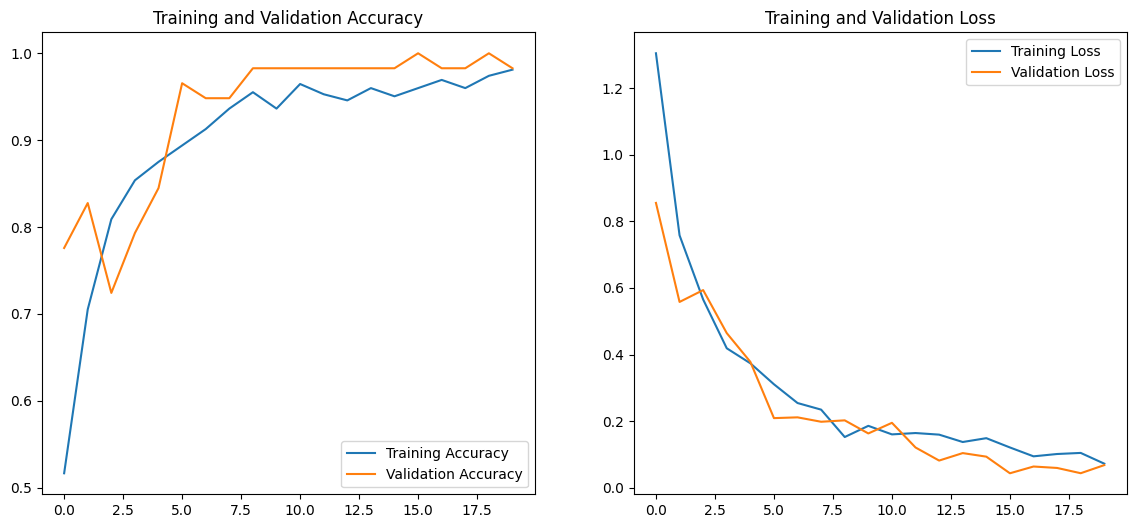

In [15]:
plot_training_history(history)